In [2]:
!pip install qiskit
from qiskit import *

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     -------------------------------------- 241.5/241.5 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 5.0/5.0 MB 3.2 MB/s eta 0:00:00
     ---------------------------------------- 9.6/9.6 MB 3.2 MB/s eta 0:00:00
     ---------------------------------------- 14.6/14.6 MB 2.7 MB/s eta 0:00:00
     ---------------------------------------- 56.6/56.6 kB 3.1 MB/s eta 0:00:00
     -------------------------------------- 110.5/110.5 kB 3.2 MB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 2.8 MB/s eta 0:00:00
     -----


[notice] A new release of pip available: 22.3 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
qr = QuantumRegister(2)

In [4]:
cr = ClassicalRegister(2)

In [5]:
circuito2 = QuantumCircuit(2)

In [6]:
circuito = QuantumCircuit(qr,cr)

In [7]:
circuito

In [8]:
%matplotlib inline

In [21]:
circuito.draw()

┌───┐
q0_0: ┤ H ├
      └───┘
q0_1: ─────
           
c0: 2/═════

In [10]:
circuito.h(qr[0]) # Aplica una puerta de Hadamard en el qbit 0

In [18]:
!pip install pylatexenc



[notice] A new release of pip available: 22.3 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
circuito.draw(output="mpl")

MissingOptionalLibraryError: "The 'pylatexenc' library is required to use 'MatplotlibDrawer'. You can install it with 'pip install pylatexenc'."

In [14]:
from qiskit.tools.visualization import plot_bloch_multivector

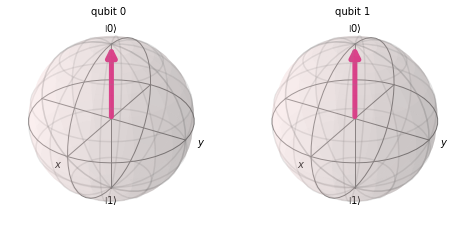

In [16]:
plot_bloch_multivector(circuito2)

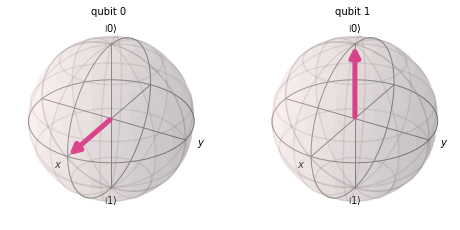

In [22]:
plot_bloch_multivector(circuito)

In [23]:
circuito.cx(qr[0], qr[1]) # Aplica una puerta de CNOT en el qbit 0 y 1

In [25]:
circuito.draw()

┌───┐     
q0_0: ┤ H ├──■──
      └───┘┌─┴─┐
q0_1: ─────┤ X ├
           └───┘
c0: 2/══════════

In [26]:
# Ahora vamos a medir
circuito.measure(qr,cr)

In [27]:
circuito.draw() # Ya lo hemos medido por lo tanto ya no vale para nada mas

┌───┐     ┌─┐   
q0_0: ┤ H ├──■──┤M├───
      └───┘┌─┴─┐└╥┘┌─┐
q0_1: ─────┤ X ├─╫─┤M├
           └───┘ ║ └╥┘
c0: 2/═══════════╩══╩═
                 0  1

In [28]:
cr[0]

Clbit(ClassicalRegister(2, 'c0'), 0)

In [29]:
cr[1]

Clbit(ClassicalRegister(2, 'c0'), 1)

# Desde simulador en Python

In [30]:
backend_simulator = Aer.get_backend("qasm_simulator")
backend_simulator

QasmSimulator('qasm_simulator')

In [31]:
job_simulator = execute(circuito, backend=backend_simulator)

In [32]:
job_simulator

In [33]:
result = job_simulator.result()

In [34]:
result

Result(backend_name='qasm_simulator', backend_version='0.12.0', qobj_id='', job_id='e4e6ce62-89a7-4f21-8ce4-25c9af2ad918', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 550, '0x3': 474}), header=QobjExperimentHeader(creg_sizes=[['c0', 2]], global_phase=0.0, memory_slots=2, metadata=None, n_qubits=2, name='circuit-115', qreg_sizes=[['q0', 2]]), status=DONE, seed_simulator=3987329087, metadata={'batched_shots_optimization': False, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'sample_measure_time': 0.0007328, 'input_qubit_map': [[0, 0], [1, 1]], 'measure_sampling': True, 'noise': 'ideal', 'parallel_shots': 1, 'parallel_state_update': 8, 'fusion': {'enabled': False}}, time_taken=0.0019383)], date=2023-06-09T17:48:06.361248, status=COMPLETED, header=None, metadata={'parallel_experiments': 1, 'omp_enabled': True, 'max_memory_mb': 40

In [35]:
result.status

'COMPLETED'

In [36]:
from qiskit.tools.visualization import plot_histogram

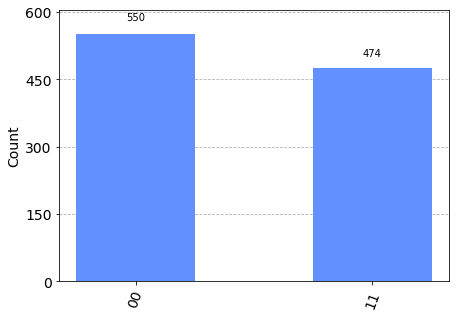

In [37]:
plot_histogram(result.get_counts(circuito))

# Desde el servidor de IBM

In [38]:
from qiskit import IBMQ

In [39]:
IBMQ.save_account('')

C:\Users\JoaquinLeon\AppData\Local\Temp\ipykernel_10008\3043582684.py:1: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.save_account('b81cb8e3584d8ca8b2dff9144ca8158ef86af0a09d82cc0bc595df24141a1aa46e1305f6cc9e5e3160eaf678b928f1f1aff5f8da36cc4692c79ec9dd7ec80108')
C:\Users\JoaquinLeon\AppData\Local\Temp\ipykernel_10008\3043582684.py:1: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provide

In [40]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [41]:
provider = IBMQ.get_provider('ibm-q')
provider

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [42]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_jakarta') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_lagos') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairo

In [45]:
qcomp = provider.get_backend('ibmq_quito')
qcomp

<IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>

In [46]:
job = execute(circuito, backend = qcomp)
job

In [47]:
from qiskit.tools.monitor import job_monitor

In [48]:
job_monitor(job)

Job Status: job has successfully run


In [49]:
result = job.result()
result

Result(backend_name='ibmq_quito', backend_version='1.1.41', qobj_id='8390e7c9-2177-41c4-abaf-61c5cbc6b392', job_id='circuit-runner_ci1eo4tn4pk8hhh9o1dg_8239_0', success=True, results=[ExperimentResult(shots=4000, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 1954, '0x1': 130, '0x2': 209, '0x3': 1707}), header=QobjExperimentHeader(clbit_labels=[['c0', 0], ['c0', 1]], creg_sizes=[['c0', 2]], global_phase=0.7853981633974483, memory_slots=2, metadata={}, n_qubits=5, name='circuit-115', qreg_sizes=[['q', 5]], qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3], ['q', 4]]), status=done)], date=2023-06-09 19:08:45+10:00, status=Successful completion, header=QobjHeader(backend_name='ibmq_quito', backend_version='1.1.41', _ibm_tracing_={'uber-trace-id': 'e1b7c95931999a6be879514fa71fa408:fcfefd8293935949:cc024d3946ab10e6:1'}), execution_id='3ad1503a-06a5-11ee-80fb-b02628f7f59e', time_taken=2.8865158810000002, error=None, client_version={'qiskit-ibmq-provider': '0.20.2', '

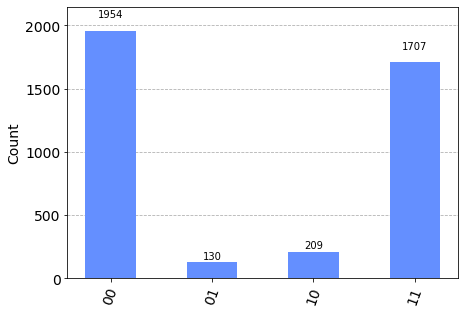

In [51]:
plot_histogram(result.get_counts(circuito))

# Parte 2

2 - Busca información acerca de los Estados de Bell en Computación Cuántica

Los estados de Bell, también conocidos como estados maximamente entrelazados, son estados cuánticos de dos qubits que están altamente correlacionados y entrelazados. Hay cuatro estados de Bell en total, denominados como |Φ⁺⟩, |Φ⁻⟩, |Ψ⁺⟩ y |Ψ⁻⟩. Estos estados son importantes en la computación cuántica porque se utilizan en diversos protocolos y algoritmos cuánticos, como el teletransporte cuántico y la codificación superdensa. Los estados de Bell permiten la transferencia de información cuántica de manera eficiente y preservando la entrelazación cuántica, lo que los hace fundamentales en la construcción de redes y aplicaciones cuánticas.

# Parte 3

In [52]:
!pip install --upgrade pip
!pip install cirq

  Using cached pip-23.1.2-py3-none-any.whl (2.1 MB)


ERROR: To modify pip, please run the following command:
C:\Users\JoaquinLeon\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.3 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip
  DEPRECATION: lark is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559
  DEPRECATION: rpcq is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559


     -------------------------------------- 577.4/577.4 kB 3.0 MB/s eta 0:00:00
     -------------------------------------- 594.6/594.6 kB 2.7 MB/s eta 0:00:00
     ---------------------------------------- 57.6/57.6 kB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 1.8/1.8 MB 3.3 MB/s eta 0:00:00
     ---------------------------------------- 66.4/66.4 kB 3.5 MB/s eta 0:00:00
     ---------------------------------------- 2.0/2.0 MB 3.3 MB/s eta 0:00:00
  Using cached protobuf-3.20.3-cp310-cp310-win_amd64.whl (904 kB)
     -------------------------------------- 120.2/120.2 kB 2.3 MB/s eta 0:00:00
     ---------------------------------------- 47.9/47.9 kB 2.5 MB/s eta 0:00:00
     -------------------------------------- 223.8/223.8 kB 3.4 MB/s eta 0:00:00
     -------------------------------------- 181.3/181.3 kB 3.6 MB/s eta 0:00:00
     -------------------------------------- 223.6/223.6 kB 2.7 MB/s eta 0:00:00
     ---------------------------------------- 4.1/4.1 MB 3


[notice] A new release of pip available: 22.3 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [53]:
!pip install cirq-core[contrib]

     ---------------------------------------- 84.1/84.1 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 65.5/65.5 kB 1.8 MB/s eta 0:00:00
     -------------------------------------- 449.2/449.2 kB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 48.3/48.3 kB 2.4 MB/s eta 0:00:00
     -------------------------------------- 321.4/321.4 kB 2.5 MB/s eta 0:00:00
  Running setup.py install for pylatex: started
  Running setup.py install for pylatex: finished with status 'done'


  DEPRECATION: pylatex is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559

[notice] A new release of pip available: 22.3 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [56]:
import cirq_google;
print(cirq_google.Sycamore)

                                             (0, 5)───(0, 6)
                                             │        │
                                             │        │
                                    (1, 4)───(1, 5)───(1, 6)───(1, 7)
                                    │        │        │        │
                                    │        │        │        │
                           (2, 3)───(2, 4)───(2, 5)───(2, 6)───(2, 7)───(2, 8)
                           │        │        │        │        │        │
                           │        │        │        │        │        │
                  (3, 2)───(3, 3)───(3, 4)───(3, 5)───(3, 6)───(3, 7)───(3, 8)───(3, 9)
                  │        │        │        │        │        │        │        │
                  │        │        │        │        │        │        │        │
         (4, 1)───(4, 2)───(4, 3)───(4, 4)───(4, 5)───(4, 6)───(4, 7)───(4, 8)───(4, 9)
         │        │        │        │        │        │   

In [57]:
try:
    import cirq
except ImportError:
    print("installing cirq...")
    !pip install --quiet cirq
    print("installed cirq.")
    import cirq

import cirq_google

In [58]:
# CIRQ (Alternativa de google a qiskit)

circuit = cirq.Circuit()
qubits = cirq.LineQubit.range(3)
circuit.append(cirq.H(qubits[0]))
circuit.append(cirq.H(qubits[1]))
circuit.append(cirq.H(qubits[2]))
print(circuit)

0: ───H───

1: ───H───

2: ───H───


In [59]:
circuit = cirq.Circuit()
ops = [cirq.H(q) for q in cirq.LineQubit.range(3)]
circuit.append(ops)
print(circuit)

0: ───H───

1: ───H───

2: ───H───


In [60]:
# Append with generator
circuit = cirq.Circuit()
circuit.append(cirq.H(q) for q in cirq.LineQubit.range(3))
print(circuit)
# Initializer with generator
print(cirq.Circuit(cirq.H(q) for q in cirq.LineQubit.range(3)))

0: ───H───

1: ───H───

2: ───H───
0: ───H───

1: ───H───

2: ───H───


In [61]:
# Creates each gate in a separate moment by passing an iterable of Moments instead of Operations.
print(cirq.Circuit(cirq.Moment([cirq.H(q)]) for q in cirq.LineQubit.range(3)))

0: ───H───────────

1: ───────H───────

2: ───────────H───


In [62]:
# Create some qubits.
q0 = cirq.GridQubit(5, 6)
q1 = cirq.GridQubit(5, 5)
q2 = cirq.GridQubit(4, 5)

# Create operations using the Sycamore gate, which is supported by the Sycamore device.
# However, create operations for both adjacent and non-adjacent qubit pairs.
adjacent_op = cirq_google.SYC(q0, q1)
nonadjacent_op = cirq_google.SYC(q0, q2)

# A working circuit for the Sycamore device raises no issues.
working_circuit = cirq.Circuit()
working_circuit.append(adjacent_op)
valid = cirq_google.Sycamore.validate_circuit(working_circuit)

# A circuit using invalid operations.
bad_circuit = cirq.Circuit()
bad_circuit.append(nonadjacent_op)
try:
    cirq_google.Sycamore.validate_circuit(bad_circuit)
except ValueError as e:
    print(e)

Qubit pair is not valid on device: (cirq.GridQubit(5, 6), cirq.GridQubit(4, 5)).


In [63]:
# Create a circuit to generate a Bell State:
# 1/sqrt(2) * ( |00⟩ + |11⟩ )
bell_circuit = cirq.Circuit()
q0, q1 = cirq.LineQubit.range(2)
bell_circuit.append(cirq.H(q0))
bell_circuit.append(cirq.CNOT(q0, q1))

# Initialize Simulator
s = cirq.Simulator()

print('Simulate the circuit:')
results = s.simulate(bell_circuit)
print(results)

# For sampling, we need to add a measurement at the end
bell_circuit.append(cirq.measure(q0, q1, key='result'))

# Sample the circuit
samples = s.run(bell_circuit, repetitions=1000)

Simulate the circuit:
measurements: (no measurements)

qubits: (cirq.LineQubit(0), cirq.LineQubit(1))
output vector: 0.707|00⟩ + 0.707|11⟩

phase:
output vector: |⟩


# Parte 4

Certificaciones SQL:

Certificacion PostgreSQL:
- "PostgreSQL Database Developer" ofrecida por www.koenig-solutions.com.
Enlace: https://www.koenig-solutions.com/postgresql-database-developer-training-course

Certificacion NoSQL:
- "MongoDB Certified Developer" y "MongoDB Certified DBA" ofrecidas por MongoDB.
Enlace: https://learn.mongodb.com/pages/certification-program

Certificacion en Big Data:
- "IBM Certified Data Engineer - Big Data" ofrecida por IBM. 
Enlace: https://www.ibm.com/training/certification/50001501